## GENERATE LABELS FOR 20% SPLIT TRAINING DATA

In [67]:
#imports
import csv
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [41]:
#reading the data
train_data = pd.read_csv('../train_data/bizfeatures_meanfeature.csv')
train_label_df = pd.read_csv('train.csv')
test_data = pd.read_csv('../test_data/bizfeaturestest_meanfeature.csv')

In [42]:
#sorting the values of data
train_data = train_data.sort_values(by='business_id')
train_label_df = train_label_df.sort_values(by='business_id')
test_data = test_data.sort_values(by='business_id')

In [43]:
#converting the string to list
def str_to_nplist(string):
    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.split(',')
    return np.asarray(string).astype(np.float32)

In [44]:
#converting to labels from string
def convertlabelsfromString(s, ind):
    if type(s) == str:
        s = s.split(" ")
        s = [int(x) for x in s]
        return s
    else:
        return []

In [45]:
#randomly breaking the dataset into 80:20 ratio for training and testing
msk = np.random.rand(len(train_data)) < 0.8
train_new_model = train_data[msk]
test_new_model = train_data[~msk]
label_train_new_model = train_label_df[msk]
label_test_new_model = train_label_df[~msk]

In [46]:
#extracting features and labels from data
mean_features = np.asarray([str_to_nplist(i) for i in train_new_model['feature']])
labels = label_train_new_model['labels'].values
mean_features_test = np.asarray([str_to_nplist(i) for i in test_new_model['feature']])
labels_test = label_test_new_model['labels'].values

In [47]:
#setting the label binarizer
X = mean_features
Y = labels
label_binarizer = MultiLabelBinarizer()

In [48]:
#converting Y into required format
Y = [convertlabelsfromString(Y[i],i) for i in range(Y.shape[0])]
Y = label_binarizer.fit_transform(Y)

In [49]:
#fitting the SVM model and predicting
classifier = OneVsRestClassifier(svm.SVC(kernel='linear'))
classifier.fit(X, Y)
prediction = classifier.predict(mean_features_test)

In [50]:
values = label_binarizer.inverse_transform(prediction)
inv_values = label_binarizer.fit_transform(values)

In [57]:
Y1 = [convertlabelsfromString(labels_test[i],i) for i in range(labels_test.shape[0])]
Y2 = label_binarizer.fit_transform(Y1)

In [59]:
#F1 score
f1_score(Y2,inv_values,average='micro')

0.71912114014251782

## GENERATE LABELS FOR TEST DATA

In [34]:
#reading features and labels from data
mean_features_train = np.asarray([str_to_nplist(i) for i in train_data['feature']])
labels_train = train_label_df['labels'].values
mean_features_test = np.asarray([str_to_nplist(i) for i in test_data['feature']])

In [35]:
#setting labels binarizer
X = mean_features_train
Y = labels_train
label_binarizer = MultiLabelBinarizer()

In [36]:
Y = [convertlabelsfromString(Y[i],i) for i in range(Y.shape[0])]
Y = label_binarizer.fit_transform(Y)

In [37]:
#fitting SVM model
classifier = OneVsRestClassifier(svm.SVC(kernel='linear'))
classifier.fit(X, Y)
prediction = classifier.predict(mean_features_test)

In [38]:
values = label_binarizer.inverse_transform(prediction)
inv_values = label_binarizer.fit_transform(values)

#### LABELS VS BUSINESS ID - TEST DATA

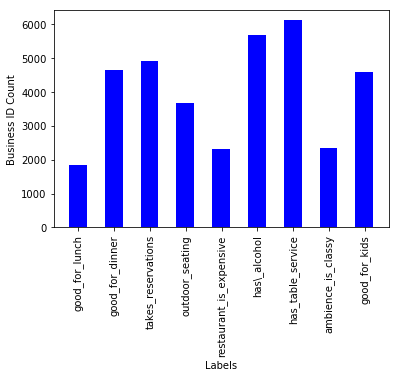

In [39]:
#counting the each label count
d = dict()
for i in range(0,len(values)):
    for j in range(0,len(values[i])):
        if values[i][j] in d.keys():
            d[values[i][j]] +=1
        else:
            d[values[i][j]] = 1

#sorting dictionary values
a = []
b = []
for key, value in sorted(d.items()):
    a.append(key)
    b.append(value)

a = np.array(a)
b = np.array(b)

#plotting graph
N = len(a)
business_count = b

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, business_count, width, color='b')
ax.set_ylabel('Business ID Count')
ax.set_xlabel('Labels')
ax.set_xticks(ind + width / 32)
ax.set_xticklabels(['good_for_lunch', 'good_for_dinner', 'takes_reservations', 'outdoor_seating', 'restaurant_is_expensive', 
                    'has\_alcohol', 'has_table_service','ambience_is_classy', 'good_for_kids'], rotation=90)
plt.show()